<a href="https://colab.research.google.com/github/bangaruprasanna/Customer-Feedback-Sentiment-Analysis/blob/main/Credit_Risk_Analysis_for_a_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)
data = {
    'ApplicantID': np.arange(1000),
    'Age': np.random.randint(18, 70, 1000),
    'Income': np.round(np.random.uniform(20000, 150000, 1000)),  # Annual income
    'LoanAmount': np.round(np.random.uniform(5000, 100000, 1000)),  # Loan requested
    'CreditScore': np.random.randint(300, 850, 1000),
    'DebtToIncomeRatio': np.round(np.random.uniform(0.1, 0.8, 1000)),  # Debt/Income
    'EmploymentYears': np.random.randint(0, 20, 1000),
    'LoanPurpose': np.random.choice(['Home', 'Car', 'Education', 'Business', 'Personal'], 1000),
    'Default': np.random.choice([0, 1], 1000, p=[0.85, 0.15])  # 15% default rate
}

df = pd.DataFrame(data)
df.to_csv('loan_applicants.csv', index=False)

In [5]:
import pandas as pd

df = pd.read_csv('loan_applicants.csv')

# Check for missing values
print(df.isnull().sum())

# Convert categorical 'LoanPurpose' to numerical (optional)
df = pd.get_dummies(df, columns=['LoanPurpose'])

# Add a risk tier based on CreditScore
df['RiskTier'] = pd.cut(df['CreditScore'],
                        bins=[300, 580, 670, 740, 850],
                        labels=['Poor', 'Fair', 'Good', 'Excellent'])

ApplicantID          0
Age                  0
Income               0
LoanAmount           0
CreditScore          0
DebtToIncomeRatio    0
EmploymentYears      0
LoanPurpose          0
Default              0
dtype: int64


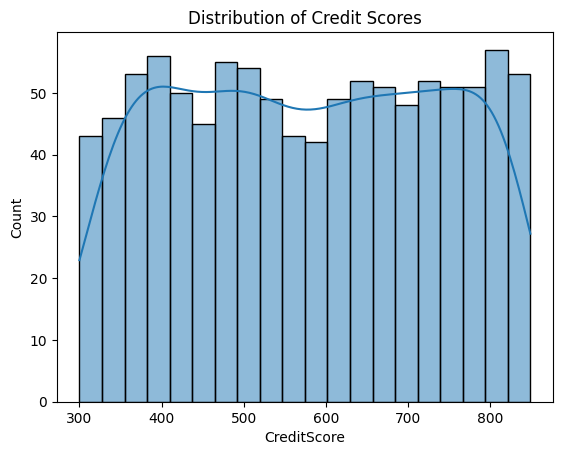

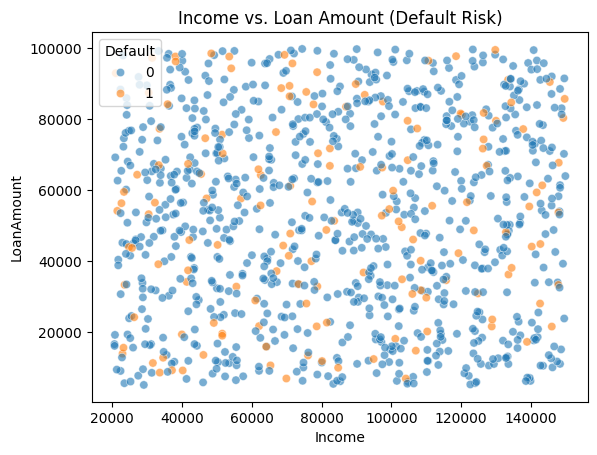

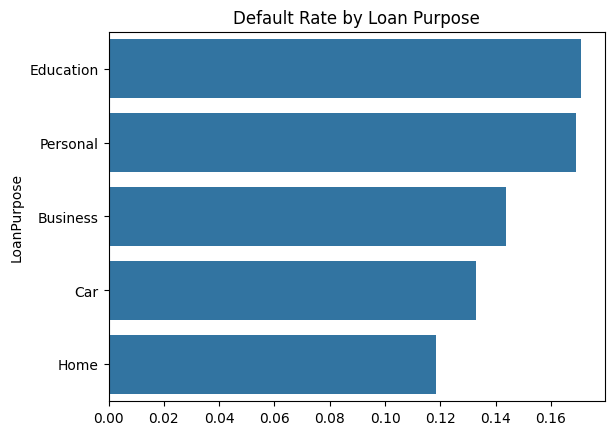

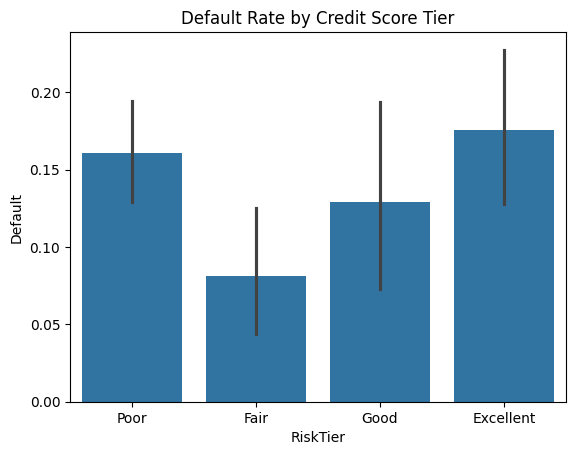

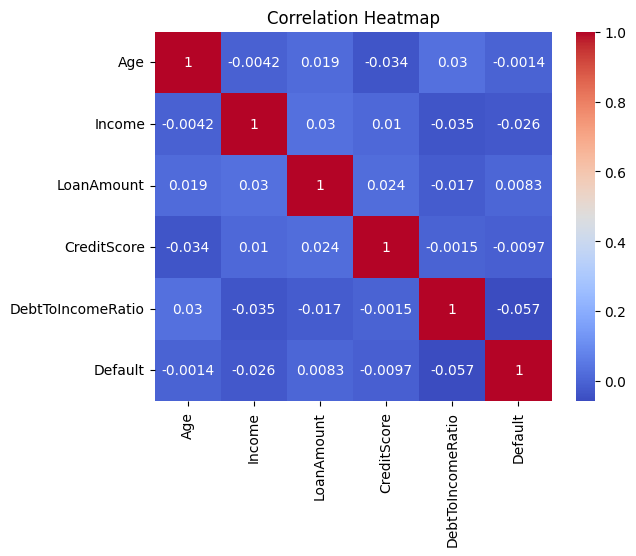

Accuracy: 0.82


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Credit score distribution
sns.histplot(df['CreditScore'], bins=20, kde=True)
plt.title('Distribution of Credit Scores')
plt.show()

# Income vs. Loan Amount (colored by Default status)
sns.scatterplot(data=df, x='Income', y='LoanAmount', hue='Default', alpha=0.6)
plt.title('Income vs. Loan Amount (Default Risk)')
plt.show()

# Default rate by loan purpose
# Calculate default rate before applying get_dummies
default_by_purpose = pd.read_csv('loan_applicants.csv').groupby('LoanPurpose')['Default'].mean().sort_values(ascending=False)

sns.barplot(x=default_by_purpose.values, y=default_by_purpose.index)
plt.title('Default Rate by Loan Purpose')
plt.show()

# Default rate by risk tier
sns.barplot(data=df, x='RiskTier', y='Default', estimator=np.mean)
plt.title('Default Rate by Credit Score Tier')
plt.show()

# Numeric feature correlations
corr = df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'DebtToIncomeRatio', 'Default']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare features (X) and target (y)
X = df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'DebtToIncomeRatio']]
y = df['Default']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")